 ### Image based fashion Recommendation system

In [156]:
#import libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import glob

In [157]:
#load the csv file
data = pd.read_csv('styles.csv')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [158]:
#drop unnecessary columns
data = data.drop(columns=['Unnamed: 10','Unnamed: 11'])
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### Check the distribution of items in the dataset

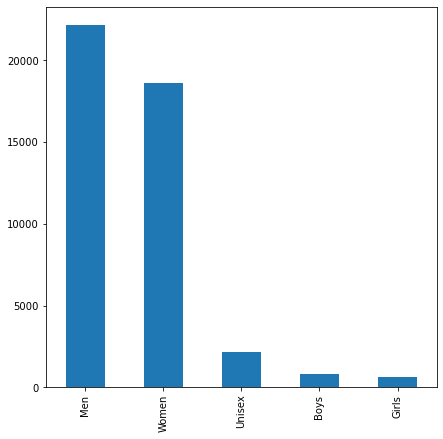

In [159]:
data['gender'].value_counts().plot(kind='bar',figsize=(7,7))

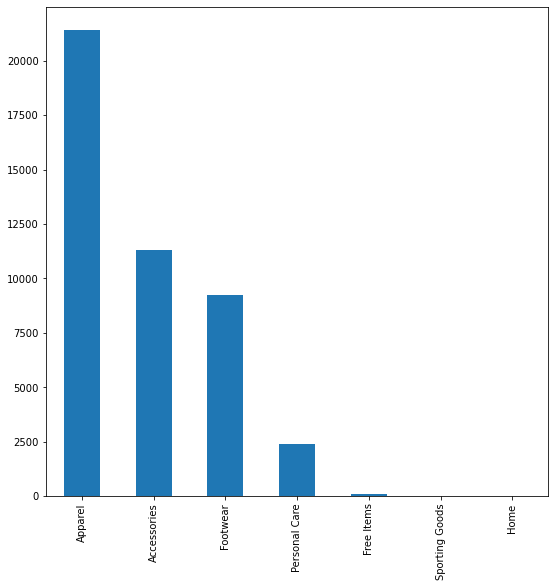

In [160]:
data['masterCategory'].value_counts().plot(kind='bar',figsize=(9,9))

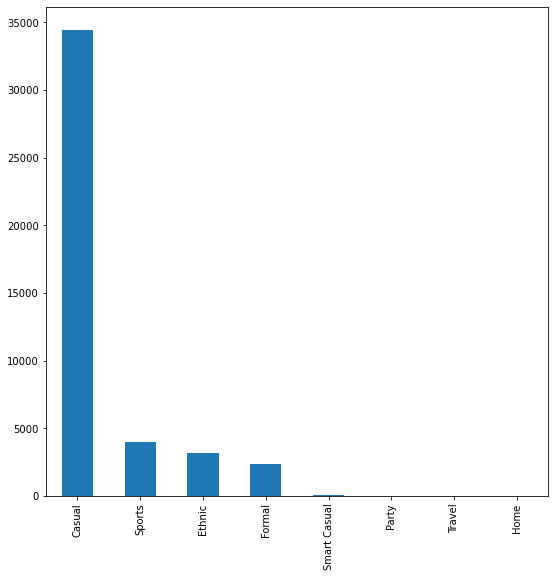

In [161]:
data['usage'].value_counts().plot(kind='bar',figsize=(9,9))

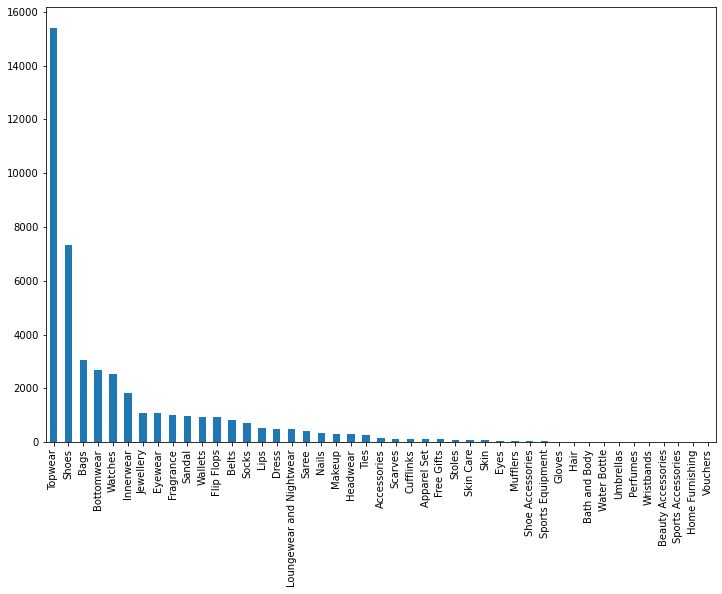

In [162]:
data['subCategory'].value_counts().plot(kind='bar',figsize=(12,8))

In [163]:
data.head(1)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


### The mobile net V2 architecture would be used for this recommendation

In [164]:
mobile_net = MobileNetV2(weights='imagenet')

In [165]:
mobile_net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [166]:
#height and width
image_width, image_height = 224,224
num_closest_image = 4

In [167]:
#loading the files
files = glob.glob(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new/*')

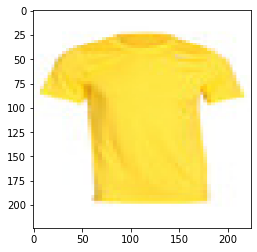

image loaded successfully!


In [168]:
#loading one image to inspect
original_img = load_img(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\2284.jpg',  target_size=(image_width, image_height))
plt.imshow(original_img)
plt.show()
print("image loaded successfully!")

In [169]:
#convert that one image to numpy array
array_img = img_to_array(pil_img)
images = np.expand_dims(array_img, axis=0)

In [170]:
#convert all images to numpy arrays
list_of_pics_array= []
for f in files:
    original_image = load_img(f, target_size=(224, 224))
    image_array = img_to_array(original_image)
    image = np.expand_dims(image_array, axis=0)

    list_of_pics_array.append(image)
    
images = np.vstack(list_of_pics_array)
processed_imgs = preprocess_input(images)

C:\Users\ampad\anaconda3\envs\tfod\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [171]:
#extract the image features using all the layers expect the prediction layer
feat_extract = Model(inputs=mobile_net.input,outputs=mobile_net.layers[-2].output)

In [172]:
#prediction
imgs_features = feat_extract.predict(processed_imgs)

In [173]:
#find the cosine similarities between the images
cosSimilarities = cosine_similarity(imgs_features)

In [174]:
#put into a dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1163.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1164.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1165.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1525.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1526.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1528.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1529.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1530.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1531.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1532.jpg,...,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3685.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3686.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3687.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3688.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3689.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\3690.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\download.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\flip flops.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\perfume.jpg,D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\sneakers.png
D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1163.jpg,1.000000,0.894153,0.583577,0.577606,0.631838,0.570109,0.523622,0.554089,0.719986,0.695266,...,0.589370,0.556014,0.592066,0.710410,0.744129,0.720850,0.570875,0.660962,0.502717,0.530769
D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1164.jpg,0.894153,1.000000,0.581596,0.601650,0.627523,0.595155,0.568988,0.589060,0.753232,0.739611,...,0.626746,0.557251,0.593365,0.771493,0.794209,0.774345,0.600806,0.681888,0.505172,0.605955
D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1165.jpg,0.583577,0.581596,1.000000,0.572307,0.625571,0.757238,0.532354,0.627447,0.675170,0.572846,...,0.682200,0.673833,0.719310,0.555498,0.543666,0.586797,0.529439,0.609892,0.496245,0.564237
D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1525.jpg,0.577606,0.601650,0.572307,1.000000,0.638889,0.524799,0.634560,0.590977,0.615612,0.603146,...,0.675956,0.549900,0.609316,0.598756,0.576940,0.596551,0.525583,0.571165,0.437238,0.499030
D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\1526.jpg,0.631838,0.627523,0.625571,0.638889,1.000000,0.646316,0.508336,0.556426,0.632326,0.510610,...,0.627937,0.584458,0.653561,0.572398,0.537087,0.587058,0.693711,0.568853,0.468268,0.501589


In [178]:
#function to compute the images and their similarity scores
def retrieve_most_similar_products(given_img,num_closest_image=5):

    print("-----------------------------------------------------------------------")
    print("original Product:")

    original = load_img(given_img, target_size=(image_width, image_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar Products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_closest_image+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_closest_image+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(image_width, image_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original Product:


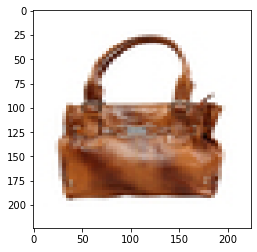

-----------------------------------------------------------------------
most similar Products:


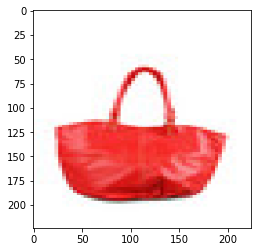

similarity score :  0.805266


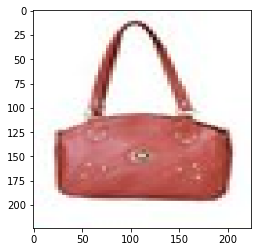

similarity score :  0.8007303


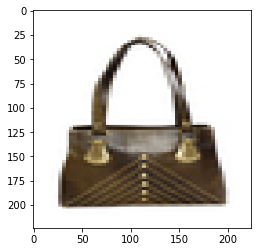

similarity score :  0.7842042


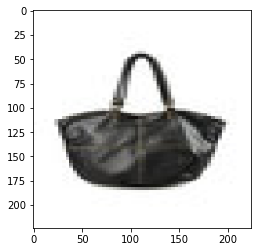

similarity score :  0.7716345


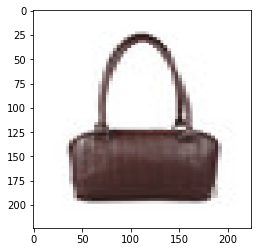

similarity score :  0.77085376


In [181]:
#dislay the orginal image and their similarities
retrieve_most_similar_products(r'D:\ML DATA\Projects\Data Science Portfolio\Image classification\Product similarity\Fashion\archive (14)\new\2647.jpg')

In [183]:
#!pip install streamlit